In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nolds
from nolitsa import lyapunov,dimension,delay,noise,data

In [16]:
%matplotlib inline
#We define a function useful to find local minimizers
def localmin(x):
    """Return all local minima from the given data set.
    Returns all local minima from the given data set.  Note that even
    "kinky" minima (which are probably not real minima) will be
    returned.
    Parameters
    ----------
    x : array
        1D scalar data set.
    Returns
    -------
    i : array
        Array containing location of all local minima.
    """
    return (np.diff(np.sign(np.diff(x))) > 0).nonzero()[0] + 1

In [17]:
#https://ourworldindata.org/coronavirus-source-data
data = pd.read_csv(r'C:\Users\javie\Covid19\datas\owid-covid-data-01-03.csv')
df =pd.DataFrame(data)
#Blegium
Blegiumdata=df.loc[df['location']=='Belgium']
Belgiumts=np.array(Blegiumdata.new_cases_per_million).astype(float)/10

#Norway
Norwaydata=df.loc[df['location']=='Norway']
Norwayts=np.array(Norwaydata.new_cases_per_million).astype(float)[1:]/10
# Norwayts=Norwayts[3:]

#US
USdata=df.loc[df['location']=='United States']
USts=np.array(USdata.new_cases_per_million).astype(float)[1:]/10
# USts=USts[1:]

#Chile
Chiledata=df.loc[df['location']=='Chile']
Chilets=np.array(Chiledata.new_cases_per_million).astype(float)/10

#Denmark
Denmarkdata=df.loc[df['location']=='Denmark']
Denmarkts=np.array(Denmarkdata.new_cases_per_million).astype(float)[25:]/10
# [11:]
# Denmarkts=Denmarkts[14:]

#Canada
Canadadata=df.loc[df['location']=='Canada']
Canadats=np.array(Canadadata.new_cases_per_million).astype(float)/10

#Czech Republic
CzechRdata=df.loc[df['location']=='Czech Republic']
CzechRts=np.array(CzechRdata.new_cases_per_million).astype(float)/10

#New Zealand
NZdata=df.loc[df['location']=='New Zealand']
NZts=np.array(NZdata.new_cases_per_million).astype(float)/10

#Gemrany
Germanydata=df.loc[df['location']=='Germany']
Germanyts=np.array(Alemaniadata.new_cases_per_million).astype(float)[3:]/10

#Italy
Italydata=df.loc[df['location']=='Italy']
Italyts=np.array(Italydata.new_cases_per_million).astype(float)/10

#Japan
Japandata=df.loc[df['location']=='Japan']
Japants=np.array(Japandata.new_cases_per_million).astype(float)[1:]/10

#South Korea
SKdata=df.loc[df['location']=='South Korea']
SKts=np.array(SKdata.new_cases_per_million).astype(float)[2:]/10

#Australia
Australiadata=df.loc[df['location']=='Australia']
Australiats=np.array(Australiadata.new_cases_per_million).astype(float)/10

In [18]:
Time_series=[Belgiumts,Norwayts,
             USts,Chilets,Denmarkts, 
             Germanyts, Italyts,
             Japants, SKts, Australiats, NZts]
Countries=['Belgium', 'Norway', 'United States', 'Chile', 'Denmark', 'Germany', 'Italy', 'Japan', 'South Korea',
       'Australia','New Zealand']

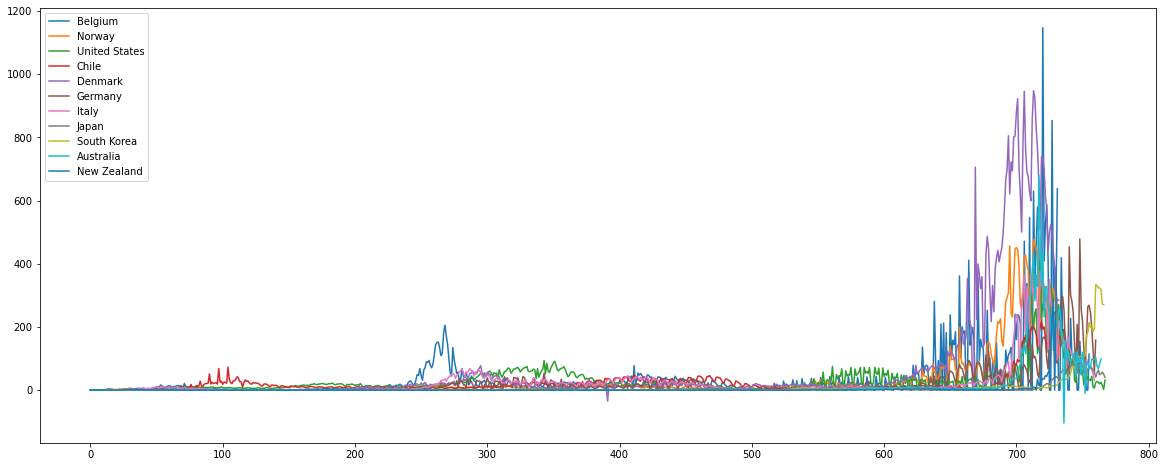

In [19]:
plt.figure(figsize=(20,8))
for j in range(len(Time_series)):
    plt.plot(Time_series[j],label=(Countries[j]))
    plt.legend()

Minima of delayed mutual information = [ 2  8 14 33 38 45 52 59 66 76 88]
Autocorrelation time = 2


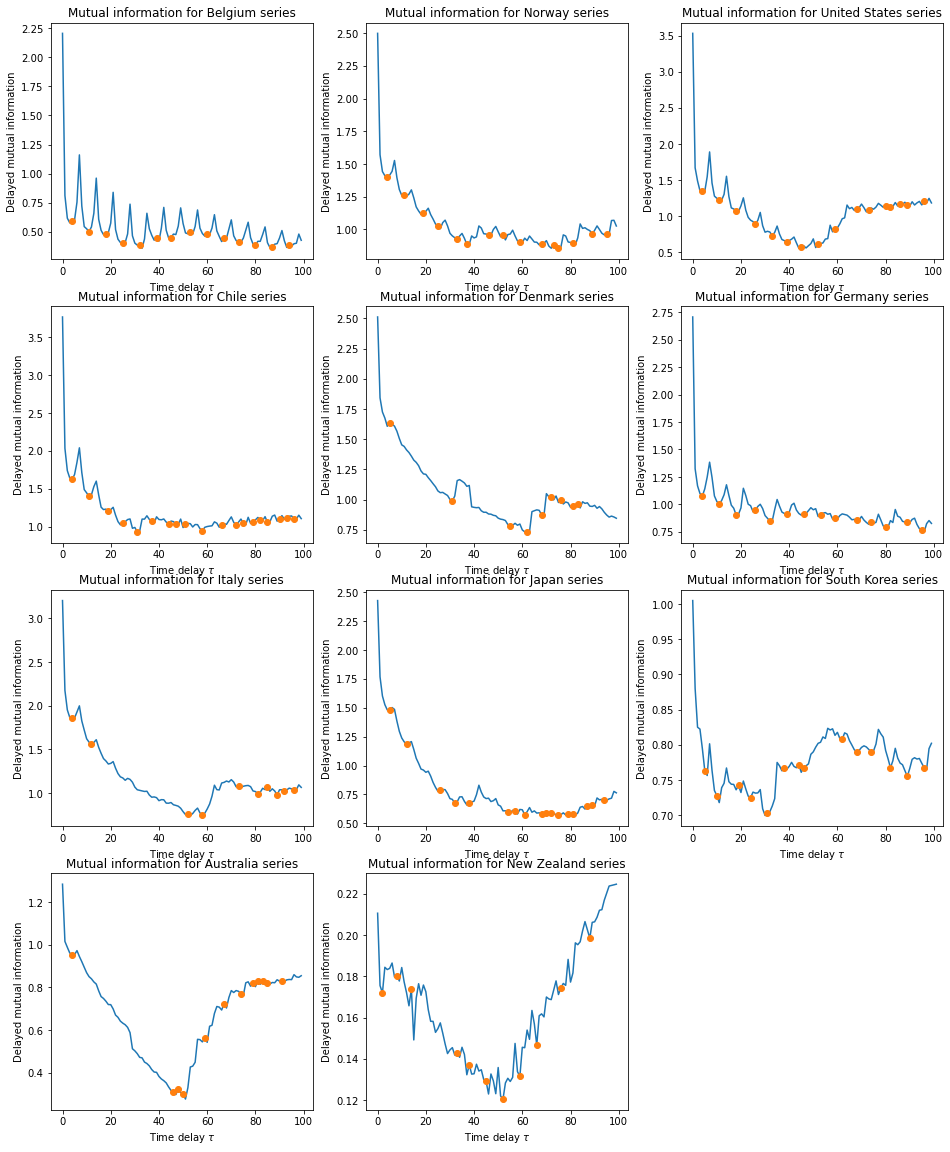

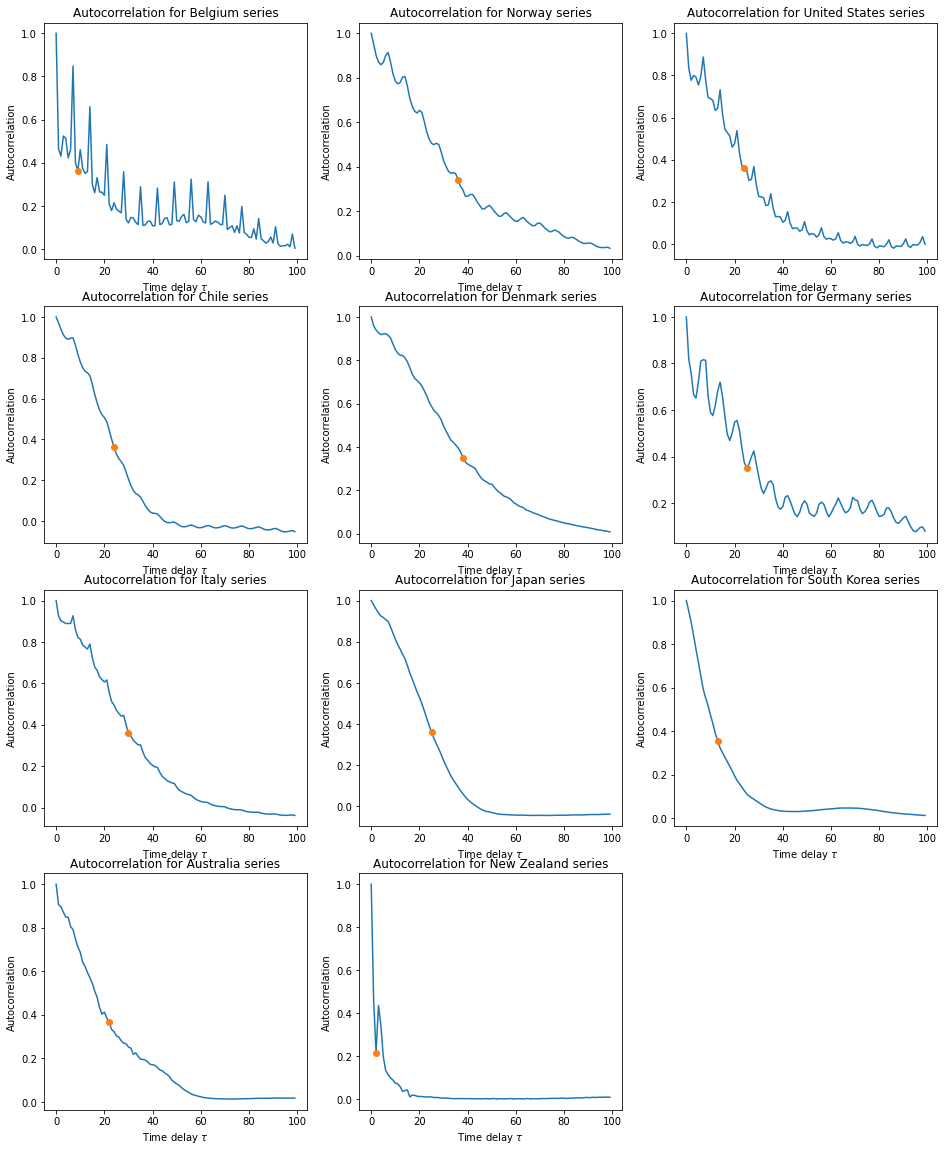

In [20]:
N=len(Time_series)
#Mutual information.
# Compute autocorrelation and delayed mutual information.
lag = np.arange(100)
i_delay=np.zeros(N)
r_delay=np.zeros(N)
plt.figure(1,figsize=(16,20))
Minimals=np.zeros(N)
for j in range(N):
    x=Time_series[j]
    i = delay.dmi(x, maxtau=100)
    i_delay = localmin(noise.sma(i, hwin=1)) + 1
    plt.subplot(4,3,0+j+1)
    plt.title(r'Mutual information for ' + str(Countries[j]) +' series')
    plt.ylabel(r'Delayed mutual information')
    plt.xlabel(r'Time delay $\tau$')
    plt.plot(lag, i, i_delay, i[i_delay], 'o')
    Minimals[j]=i_delay[0]

#Autocorrelation
Autocorrnumber=np.zeros(N)
plt.figure(2,figsize=(16,20))
for j in range(N):
    x=Time_series[j]
    r = delay.acorr(x, maxtau=100)
    r_delay = np.argmax(r < 1.0 / np.e)
    plt.subplot(4,3,0+j+1)
    plt.title(r'Autocorrelation for ' + str(Countries[j]) +' series')
    plt.xlabel(r'Time delay $\tau$')
    plt.ylabel(r'Autocorrelation')
    plt.plot(lag, r, r_delay, r[r_delay], 'o')
    Autocorrnumber[j]=r_delay

In [21]:
#Define Tau and Theilers window
Tau=Minimals
Theiler=Autocorrnumber*3

In [22]:
maxnumb=np.zeros(len(Theiler))
for j in range(len(Theiler)):   
    maxnumb[j]=int(Theiler[j])*2+3

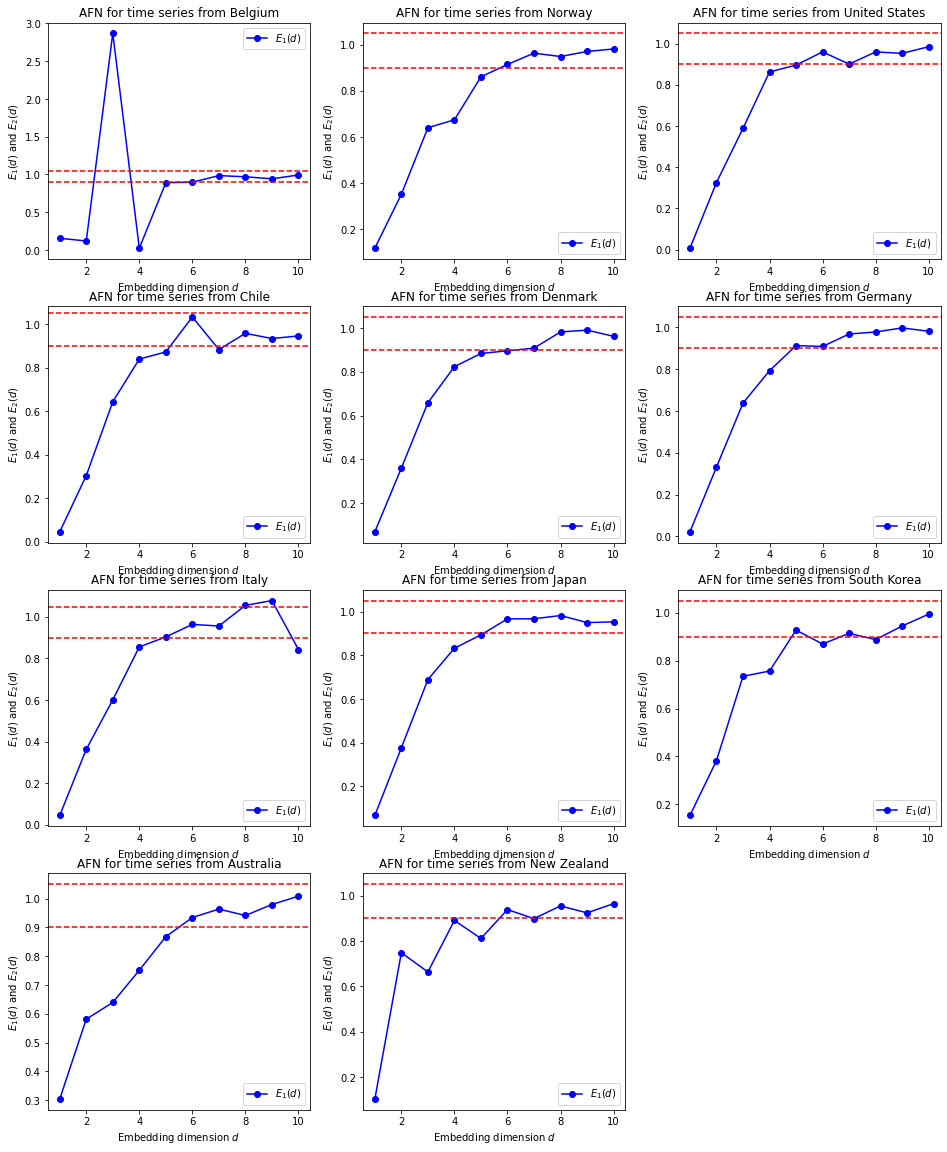

In [23]:
plt.figure(1,figsize=(16,20))
for i in range(N):
    X=Time_series[i]
    # AFN algorithm.
    dim = np.arange(1, 10 + 2)
    E, Es = dimension.afn(X, tau=int(Tau[i]), dim=dim, window=int(Theiler[i]),maxnum=4*60)
    E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]
    plt.subplot(4,3,1+i)
    plt.title(r'AFN for time series from '+Countries[i])
    plt.xlabel(r'Embedding dimension $d$')
    plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
    plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
    plt.axhline(y = 0.9, color = 'r', linestyle = '--')
    plt.axhline(y = 1.05, color = 'r', linestyle = '--')
    plt.legend()
plt.show()

In [24]:
#Define a vector of the corresponding dimensions to embed, by looking to previous graphs.
Embdim=[5,6,6,6,7,7,6,6,8,6,7]

In [25]:
def Lyapunov(X,tauu,d,theiler,maxnumb=None):
    MLEs_nolitsa=np.zeros(1)
    #Compute the average divergence for each time up to maxt
    LEs=lyapunov.mle_embed(X, dim=[int(d)], tau=int(tauu), window=int(theiler), maxt=100, maxnum=maxnumb)[0]
    sma=noise.sma(LEs[:40], hwin=0)
    sma=LEs[:40]
    p = np.polyfit(np.arange(len(sma)), sma,deg=1)
    xaxis = np.arange(len(sma))
    yaxis = p[1] + p[0] * xaxis
    #Compute the maximum lyapunov exponent as the slope
    MLEs_nolitsa[0]=p[0]
    return MLEs_nolitsa[0]*365

MLEs_nolitsa=np.zeros(N)
#Compute Lyapunov exponents
for j in range(N):
    MLEs_nolitsa[j]=Lyapunov(Time_series[j],int(Tau[j]),int(Embdim[j]),2*int(Theiler[j]))
MLEs_nolitsa

array([12.58464672,  9.55992366,  9.92803471, 14.95506501,  9.88172515,
       12.86363442, 21.43002453, 20.44308397,  8.34748216, 12.92529475,
               nan])

<BarContainer object of 11 artists>

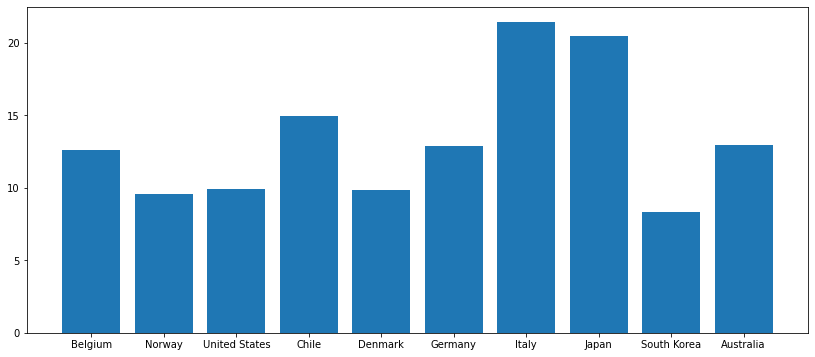

In [26]:
plt.figure(figsize=(14,6))
plt.bar(Countries,MLEs_nolitsa)

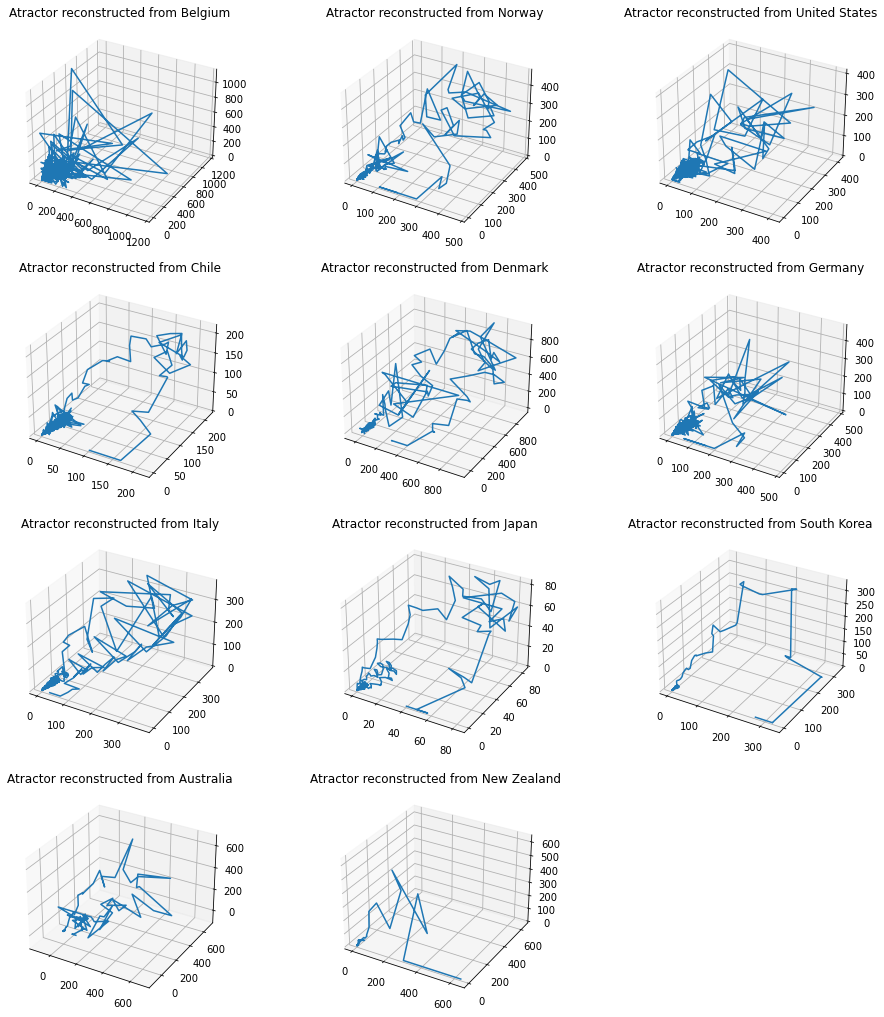

In [27]:
def Attractors(X,tauu,title='Country'):
    tau_to_use=tauu
    data=X
    data_lag0 = data.flatten()
    data_lag1 = np.roll(data, -tau_to_use).flatten()
    data_lag2 = np.roll(data, -2 * tau_to_use).flatten()
    # Plot time delay embedding
    ax = plt.subplot(4,3,1+j, projection='3d')
    ax.plot3D(data_lag0, data_lag1, data_lag2)
#     ax.view_init(45,45)
    plt.title('Attractor for '+ title)

fig = plt.figure(figsize=(16,18))
for j in range(len(Time_series)):
    Atractores(Time_series[j],int(Tau[j]),Countries[j])
plt.show()

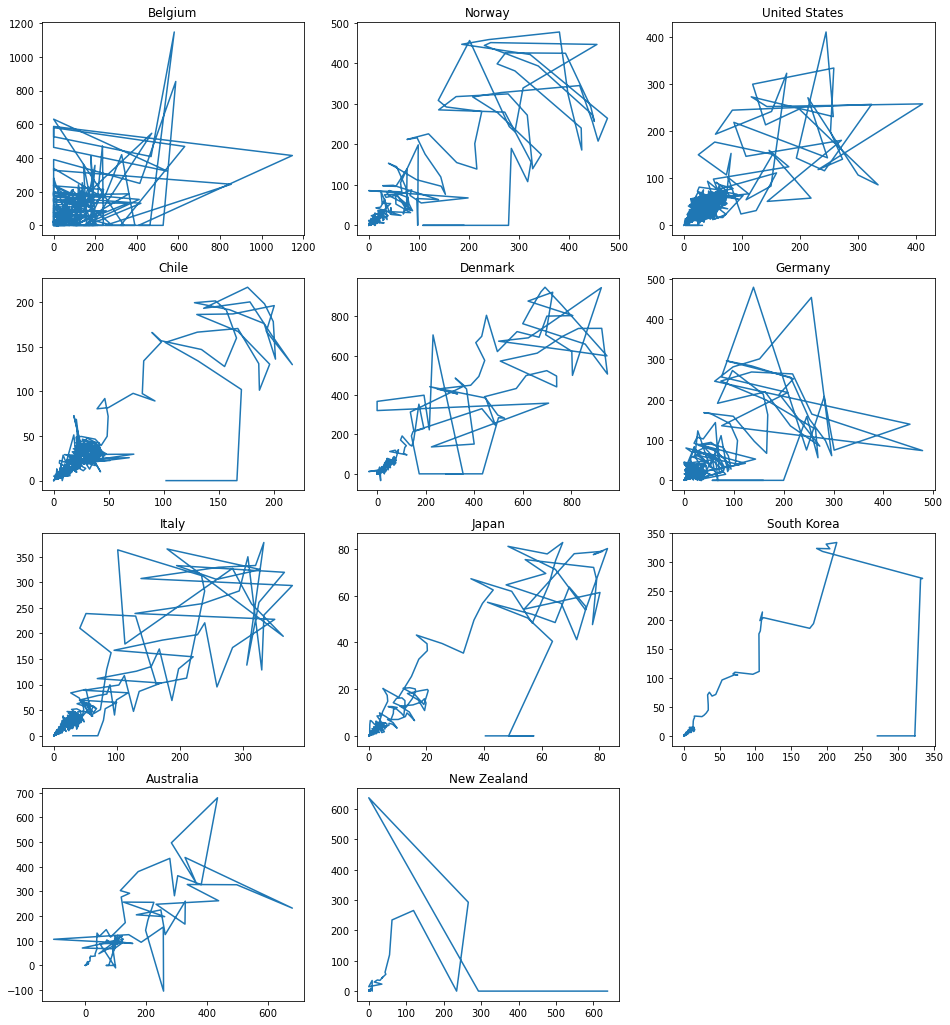

In [28]:
fig = plt.figure(figsize=(16,18))
for j in range(11):
    ax = plt.subplot(4,3,1+j)
    ax.plot(Time_series[j],np.roll(Time_series[j],-int(Tau[j])).flatten())
    plt.title(Countries[j])